#Predicción enfermedad esquizofremia

Se busca mediante un conjunto de datos y un modelo de predicción, ya establecido, para este caso Random Forest. Lograr predecir si una persona puede o no llegar a sufrir de algun tipo de ezquizofremia; Con el apoyo de algunos datos de cada persona

Elaborado por: *Luis Felipe Sanchez Sanchez*

[Link del dataset](https://drive.google.com/file/d/1WUo80uqFRUH-Qq3uQlBdNeQ3t8RtS_9T/view)


Este es un ejercicio de practica tomado de un video como practica de autoestudio

Conectamos a Goolge Drive

In [1]:
#conectamos a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imnportamos Librerias

In [2]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

Importamos el Dataset

In [3]:
#Importamos el dataset
df = pd.read_csv('/content/drive/MyDrive/Ejecicios de practica/Predicción-Random-Forest/dataset_esquizofrenia.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   edad                   5610 non-null   int64
 1   genero                 5610 non-null   int64
 2   educacion              5610 non-null   int64
 3   est_civil              5610 non-null   int64
 4   ocupacion              5610 non-null   int64
 5   nivel_ing              5610 non-null   int64
 6   vivienda               5610 non-null   int64
 7   historia_familiar      5610 non-null   int64
 8   uso_sustancias         5610 non-null   int64
 9   intento_suic           5610 non-null   int64
 10  riesgo_entorno_social  5610 non-null   int64
 11  factores_estres        5610 non-null   int64
 12  adherencia_medicacion  5610 non-null   int64
 13  diagnostico            5610 non-null   int64
dtypes: int64(14)
memory usage: 613.7 KB


In [5]:
df.head()

,edad,genero,educacion,est_civil,ocupacion,nivel_ing,vivienda,historia_familiar,uso_sustancias,intento_suic,riesgo_entorno_social,factores_estres,adherencia_medicacion,diagnostico
0,24,1,4,0,1,1,0,1,1,1,1,0,0,1
1,27,0,5,2,3,2,1,0,1,0,2,1,1,0
2,38,0,3,3,2,0,1,0,0,0,0,1,0,0
3,80,0,3,3,1,1,0,0,0,0,2,0,2,0
4,38,0,2,0,2,1,0,0,0,0,0,0,2,0


In [6]:
df.describe()

,edad,genero,educacion,est_civil,ocupacion,nivel_ing,vivienda,historia_familiar,uso_sustancias,intento_suic,riesgo_entorno_social,factores_estres,adherencia_medicacion,diagnostico
count,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000,5610.000000
mean,49.107308,0.501604,3.048663,1.517825,1.503922,0.990731,0.493939,0.410517,0.270410,0.157576,1.001783,1.004813,0.997504,0.514617
std,18.223271,0.500042,1.409397,1.111915,1.114613,0.812358,0.500008,0.491971,0.444211,0.364375,0.812628,0.820150,0.836198,0.499831
min,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,65.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000
max,80.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000


Validación de datos faltantes

In [7]:
df.isna().sum()

,0
edad,0
genero,0
educacion,0
est_civil,0
ocupacion,0
nivel_ing,0
vivienda,0
historia_familiar,0
uso_sustancias,0
intento_suic,0


In [8]:
df.isnull()

,edad,genero,educacion,est_civil,ocupacion,nivel_ing,vivienda,historia_familiar,uso_sustancias,intento_suic,riesgo_entorno_social,factores_estres,adherencia_medicacion,diagnostico
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5606,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5607,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5608,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##Establecemos el modelo

In [9]:
from sklearn.model_selection import train_test_split #Fixed typo skelarn to sklearn
#Se usará 90% para entrenamiento y 10% para prueba

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [10]:
#Mostramos los resultados del tamaño
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5049, 13)
(561, 13)
(5049,)
(561,)


Entrenamos el Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(random_state=123, oob_score=True)
modelo.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=123)

In [12]:
#Puntaje de validación
modelo.oob_score_
#Tiene una exactitud del 76%

0.7656961774608834

Cantidad de arboles del modelo

In [13]:
len(modelo.estimators_)

100

Calculamos diferentes metricas como Presicióm, Recall y F1

In [14]:
#Calculamos diferentes metricas como Presicióm, Recall y F1
from sklearn.metrics import precision_score, recall_score, f1_score
#calculamos Recall
y_pred = modelo.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
#Calculamos Presición
precision = precision_score(y_test, y_pred)
print("Presición:", precision)
#Calculamos F1
f1 = f1_score(y_test, y_pred)
print("F1:", f1)

Recall: 0.7467105263157895
Presición: 0.8049645390070922
F1: 0.7747440273037542


##Efecto Hiper-parámetros

In [15]:
modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

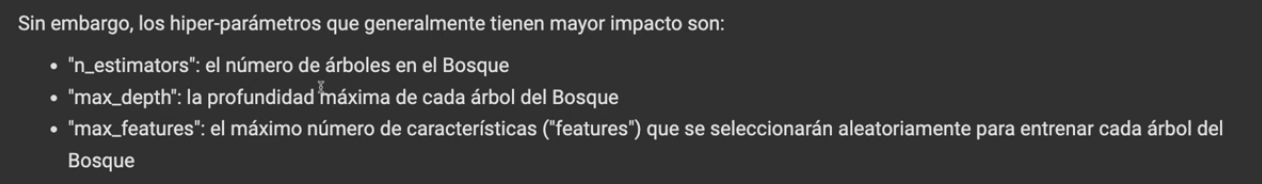